In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [22]:
ipl_df = pd.read_csv('match_data.csv', low_memory=False)
ipl_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,cricsheet_id
0,1370353,2023,5/29/2023,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
1,1370353,2023,5/29/2023,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
2,1370353,2023,5/29/2023,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
3,1370353,2023,5/29/2023,"Narendra Modi Stadium, Ahmedabad",1,0.4,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
4,1370353,2023,5/29/2023,"Narendra Modi Stadium, Ahmedabad",1,0.5,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353


In [23]:
ipl_df['runs'] = ipl_df['runs_off_bat'] + ipl_df['extras']
ipl_df['currentTotal'] = ipl_df.groupby(['match_id', 'innings'])['runs'].transform(lambda x: x.cumsum())
ipl_df['wickets'] = ipl_df.groupby(['match_id', 'innings'], group_keys=False)['player_dismissed'].apply(lambda x: x.notna().cumsum())
ipl_df['total_runs'] = ipl_df.groupby(['match_id', 'innings'])['runs'].transform('sum')
ipl_df['overs'] = ipl_df['ball'].apply(math.ceil)
ipl_df = ipl_df.drop(columns=['runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty'])

In [24]:
csk_df = ipl_df[(ipl_df['venue'] == 'MA Chidambaram Stadium, Chepauk') | (ipl_df['venue'] == 'MA Chidambaram Stadium, Chepauk, Chennai') | (ipl_df['venue'] == 'MA Chidambaram Stadium') ]
csk_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,wicket_type,player_dismissed,cricsheet_id,runs,currentTotal,wickets,total_runs,overs
458,1370351,2023,5/24/2023,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.1,Mumbai Indians,Lucknow Super Giants,Ishan Kishan,RG Sharma,KH Pandya,NaN,NaN,1370351,4,4,0,182,1
459,1370351,2023,5/24/2023,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.2,Mumbai Indians,Lucknow Super Giants,Ishan Kishan,RG Sharma,KH Pandya,NaN,NaN,1370351,1,5,0,182,1
460,1370351,2023,5/24/2023,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.3,Mumbai Indians,Lucknow Super Giants,RG Sharma,Ishan Kishan,KH Pandya,NaN,NaN,1370351,0,5,0,182,1
461,1370351,2023,5/24/2023,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.4,Mumbai Indians,Lucknow Super Giants,RG Sharma,Ishan Kishan,KH Pandya,NaN,NaN,1370351,0,5,0,182,1
462,1370351,2023,5/24/2023,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.5,Mumbai Indians,Lucknow Super Giants,RG Sharma,Ishan Kishan,KH Pandya,NaN,NaN,1370351,0,5,0,182,1


In [28]:
matches_over_180 = csk_df[(csk_df['innings'] == 1) & (csk_df['currentTotal'] > 180) & (csk_df['season'] == '2023')]

# Extract unique match IDs
match_ids_over_180 = matches_over_180['match_id'].unique()
print(match_ids_over_180)

[1370351 1359515 1359480]


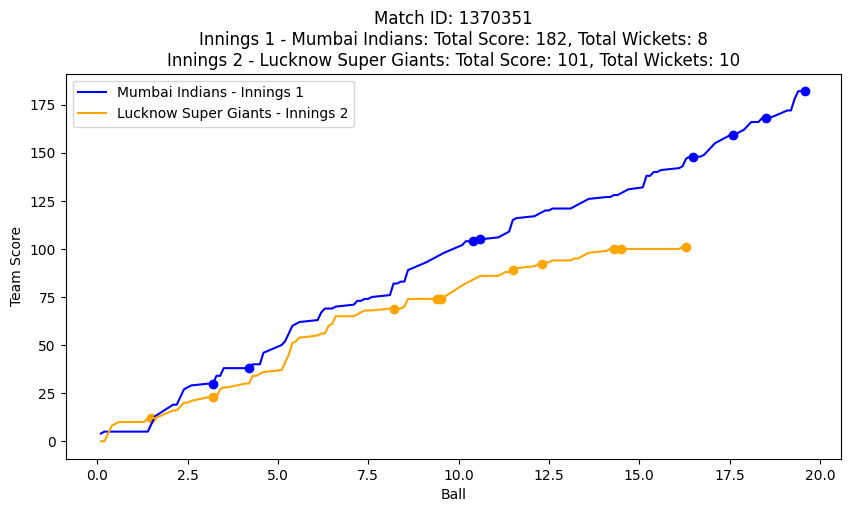

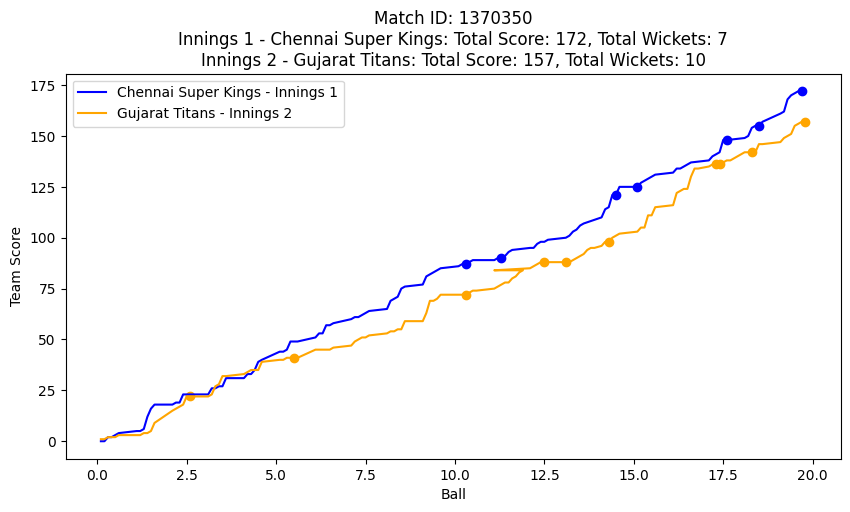

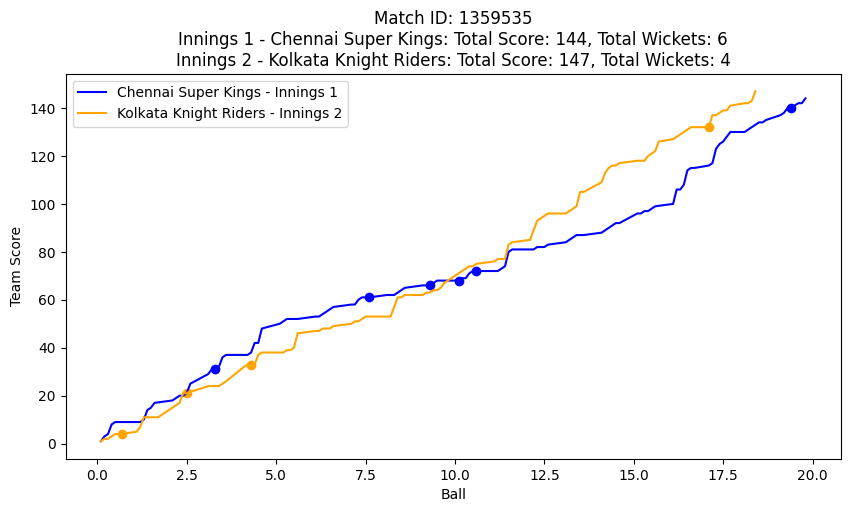

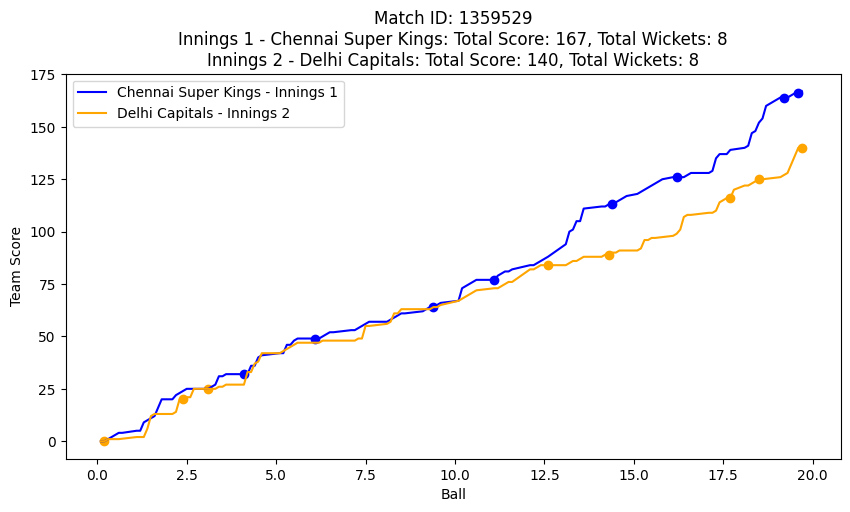

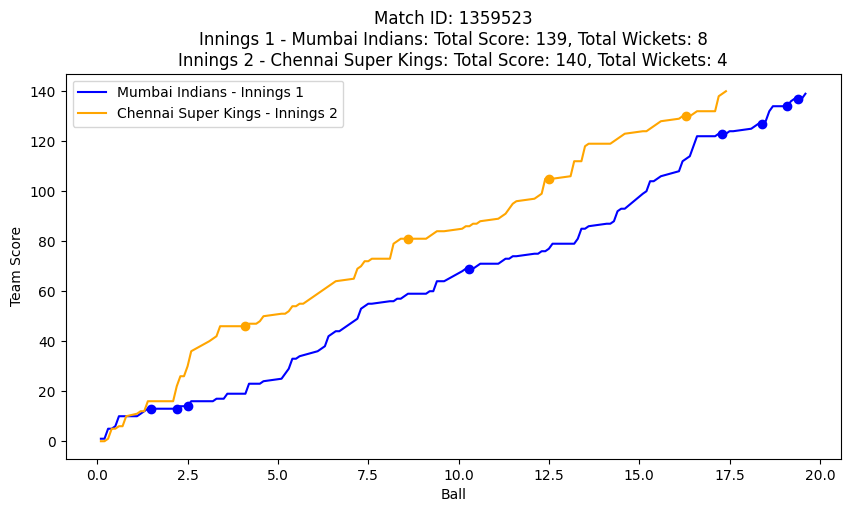

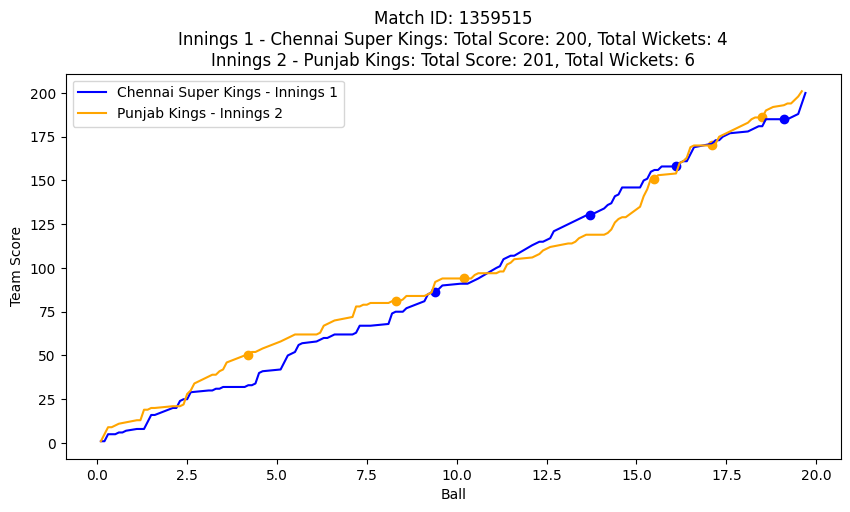

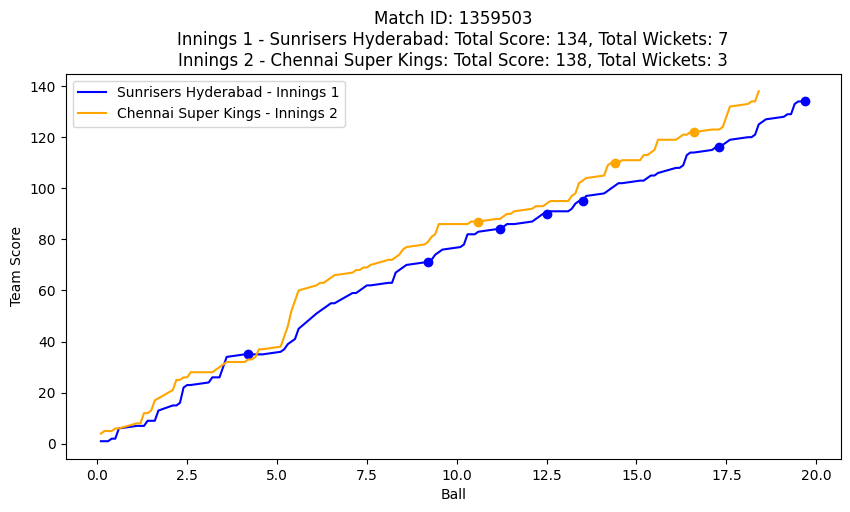

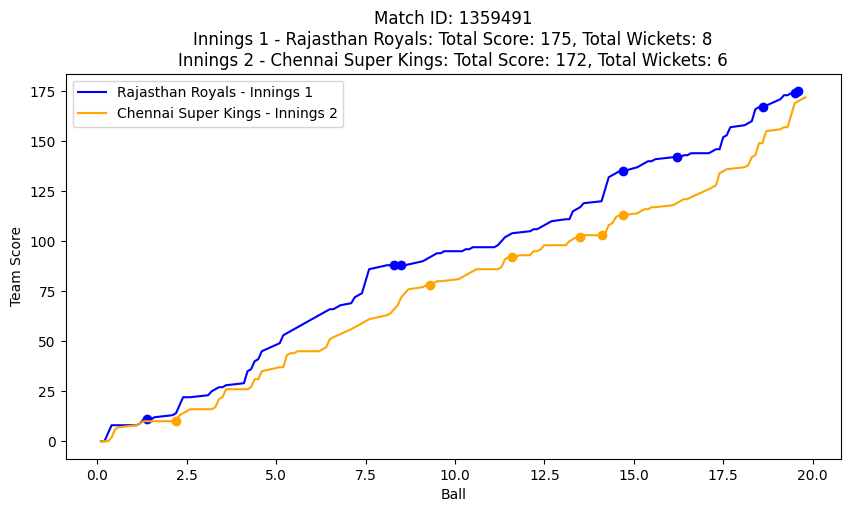

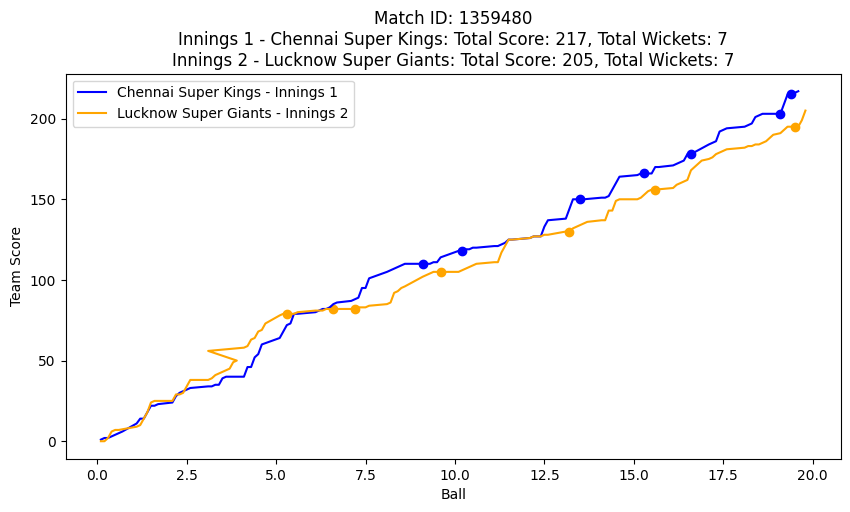

In [40]:
matches_over_180 = csk_df[(csk_df['innings'] == 1) & (csk_df['season'] == '2023')]

# Extract unique match IDs
match_ids_over_180 = matches_over_180['match_id'].unique()

for match_id in match_ids_over_180:
    match_stats = csk_df[csk_df['match_id'] == match_id]
    team1 = match_stats[match_stats['innings'] == 1]['batting_team'].iloc[0]  # Get the team name for Innings 1
    team2 = match_stats[match_stats['innings'] == 2]['batting_team'].iloc[0]  # Get the team name for Innings 2
    
    innings1 = match_stats[match_stats['innings'] == 1]
    innings2 = match_stats[match_stats['innings'] == 2]

    # Calculate total score and total wickets for each innings
    total_score_innings1 = innings1['currentTotal'].iloc[-1]
    total_wickets_innings1 = innings1['wickets'].max()
    total_score_innings2 = innings2['currentTotal'].iloc[-1]
    total_wickets_innings2 = innings2['wickets'].max()

    # Plot for each match
    plt.figure(figsize=(10, 5))
    plt.plot(innings1['ball'], innings1['currentTotal'], label=f'{team1} - Innings 1', color='blue')
    plt.scatter(innings1['ball'][innings1['wicket_type'].notna()], innings1['currentTotal'][innings1['wicket_type'].notna()], color='blue', marker='o', label='_nolegend_')  # Markers for wickets in Innings 1
    plt.plot(innings2['ball'], innings2['currentTotal'], label=f'{team2} - Innings 2', color='orange')
    plt.scatter(innings2['ball'][innings2['wicket_type'].notna()], innings2['currentTotal'][innings2['wicket_type'].notna()], color='orange', marker='o', label='_nolegend_')  # Markers for wickets in Innings 2
    plt.title(f'Match ID: {match_id}\nInnings 1 - {team1}: Total Score: {total_score_innings1}, Total Wickets: {total_wickets_innings1}\nInnings 2 - {team2}: Total Score: {total_score_innings2}, Total Wickets: {total_wickets_innings2}')
    plt.xlabel('Ball')
    plt.ylabel('Team Score')
    plt.legend()
    plt.show()


In [ ]:
Faf du Plessis
Virat Kohli
Rajat Patidar
Glenn Maxwell
Cameron Green
Dinesh Karthik
Anuj Rawat
Karn Sharma
Alzarri Joseph
Mayank Dagar
Mohammed Siraj

Ruturaj Gaikwad
Rachin Ravindra
Ajinkya Rahane
Daryl Mitchell
Ravindra Jadeja
Sameer Rizvi
MS Dhoni
Deepak Chahar
Maheesh Theekshana
Mustafizur Rahman
Tushar Deshpande